## Auto ARIMA Model on Electricity Production Data

In [2]:
!pip install statsmodels

In [5]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

#### Read the data

In [9]:
data = pd.read_csv("Electric_Production.csv", index_col = 0)
data.head()

,IPG2211A2N
DATE,
1985-01-01,71.5803
1985-02-01,69.7765
1985-03-01,61.6718
1985-04-01,56.7450
1985-05-01,54.6184


#### Convert Date column as index

In [10]:
data.index = pd.to_datetime(data.index)

#### Change the name of the variable to Energy Production for ease of understanding

In [11]:
data.columns = ['Energy Production']

#### Plot the data

<AxesSubplot:xlabel='DATE'>

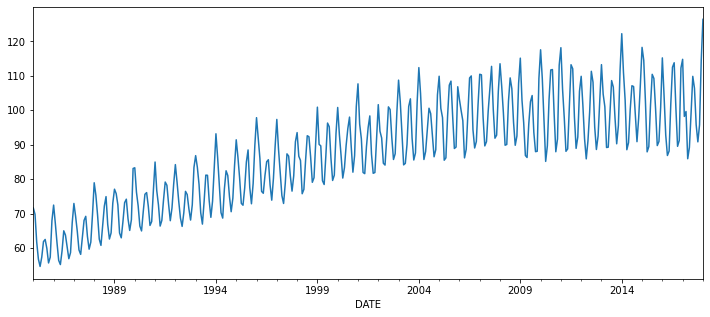

In [15]:
data['Energy Production'].plot(figsize=(12,5))

#### Decompose the data into components

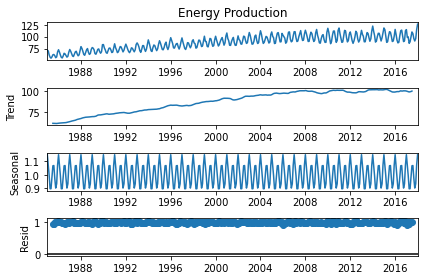

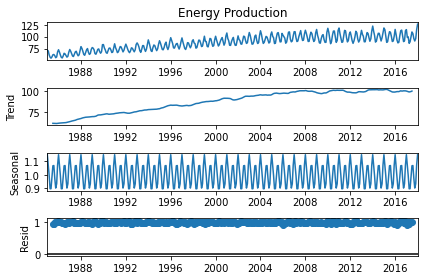

In [16]:
# ETS Decomposition
result = seasonal_decompose(data['Energy Production'],
                           model = 'multiplicative')

# ETS plot
result.plot()

#### Stationary Test

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adfuller(data['Energy Production'])

(-2.301304592960705,
 0.1715475595510106,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1838.3598201812765)

Interpretation:The Data is  non-stationary as P-value is 0.17 which is more than 0.05

#### The 'auto_arima' function from the 'pmdarima' library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

In [20]:
!pip install pmdarima

In [21]:
from pmdarima import auto_arima

In [23]:
stepwise_fit = auto_arima(data['Energy Production'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2101.677, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2746.141, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2688.747, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2622.321, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2744.268, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2490.314, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2234.385, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2091.451, Time=0.75 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2447.067, Time=0.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2103.628, Time=0.77 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2057.218, Time=0.75 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2429.491, Time=0.39 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2069.149, Time=0.90 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : 

In [25]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1020.609
Date:                Mon, 24 Jan 2022   AIC                           2057.218
Time:                        04:02:23   BIC                           2089.070
Sample:                             0   HQIC                          2069.837
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1068      0.024      4.505      0.000       0.060       0.153
ar.L1          0.9985      0.002    509.129      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -765.216      0.000      -1.002      -0.997
ma.L1         -1.3667      0.038    -35.562      0.000      -1.442      -1.291
ma.L2          0.9301      0.072     13.000      0.000       0.790       1.070
ma.L3          0.0027      0.071      0.038      0.970      -0.137       0.143
ma.L4         -0.4326      0.041    -10.496      0.000      -0.513      -0.352
sigma2         9.9195      0.639     15.525      0.000       8.667      11.172
===================================================================================
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):                23.00
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### We'll train from the years 1985-2016 and test our forecast on the years after that and compare it to the real data:

In [26]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [27]:
print(train.shape, test.shape)

(384, 1) (13, 1)


#### Fit ARIMA model to the train dataset

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
model = SARIMAX(train['Energy Production'],
               order = (2, 1, 4))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [30]:
result = model.fit()
result.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Energy Production   No. Observations:                  384
Model:               SARIMAX(2, 1, 4)   Log Likelihood                -980.101
Date:                Mon, 24 Jan 2022   AIC                           1974.201
Time:                        04:09:04   BIC                           2001.837
Sample:                    01-01-1985   HQIC                          1985.164
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9979      0.002    423.516      0.000       0.993       1.003
ar.L2         -0.9984      0.002   -545.005      0.000      -1.002      -0.995
ma.L1         -1.3003      0.047    -27.491      0.000      -1.393      -1.208
ma.L2          0.9209      0.087     10.561      0.000       0.750       1.092
ma.L3          0.0197      0.090      0.220      0.826      -0.156       0.196
ma.L4         -0.3888      0.057     -6.863      0.000      -0.500      -0.278
sigma2         9.6628      0.656     14.719      0.000       8.376      10.949
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                23.10
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prediction of ARIMA model against the test set

In [31]:
start = len(train)
end = len(train) + len(test) - 1

In [35]:
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

<AxesSubplot:xlabel='DATE'>

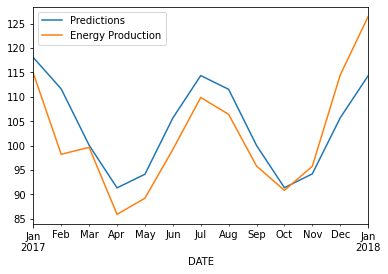

In [36]:
# plot predictions and actual values
predictions.plot(legend = True)
test['Energy Production'].plot(legend = True)

### Evaluate the model using MSE and RMSE

In [38]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [39]:
rmse(test['Energy Production'], predictions)

6.654400837160366

In [40]:
mean_squared_error(test['Energy Production'], predictions)

44.28105050160058

### Forcast using ARIMA Model

In [44]:
model = model = SARIMAX(data['Energy Production'],
                        order = (2, 1, 4))
result = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Forecast for the next 3 years

In [47]:
forecast = result.predict(start = len(data),
                        end = (len(data)-1) + 3*12,
                        typ = 'levels').rename('Forecast')

### Plot the forecast values

<AxesSubplot:xlabel='DATE'>

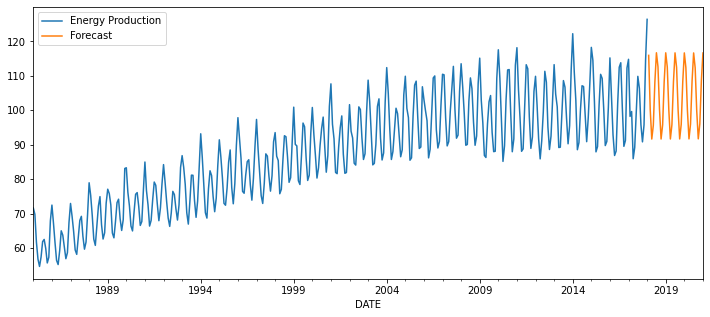

In [48]:
data['Energy Production'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)